# Итоговая работа по предмету "Python для аналитиков"

### Визуальный анализ базы данных по продажам 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - - - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Условие

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

## Задание 1

### 1.1. 
Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv

### 1.2. Изучите стоимости недвижимости

**_Гистограмма по цене реализованной недвижимости_**

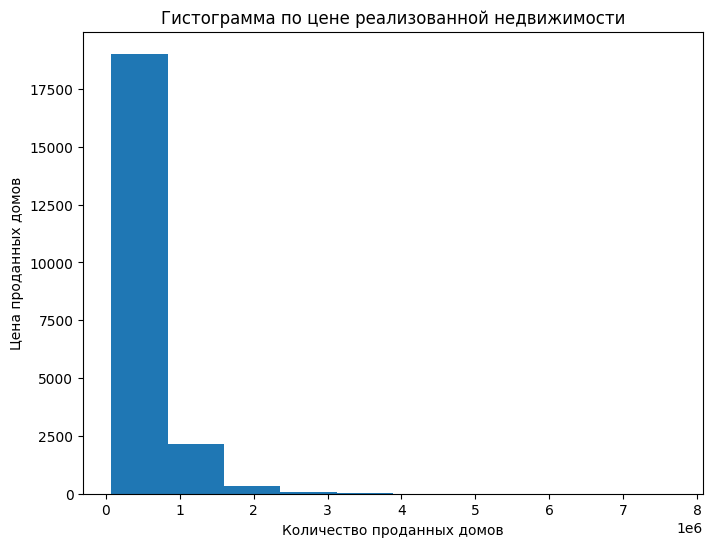

In [61]:
plt.figure(figsize= (8,6))
plt.hist(df['price'])
plt.title('Гистограмма по цене реализованной недвижимости')
plt.xlabel('Количество проданных домов')
plt.ylabel('Цена проданных домов');

**_Анализ недвижимости по стоимости кв.м_**

### 1.3 Изучите распределение квадратуры жилой

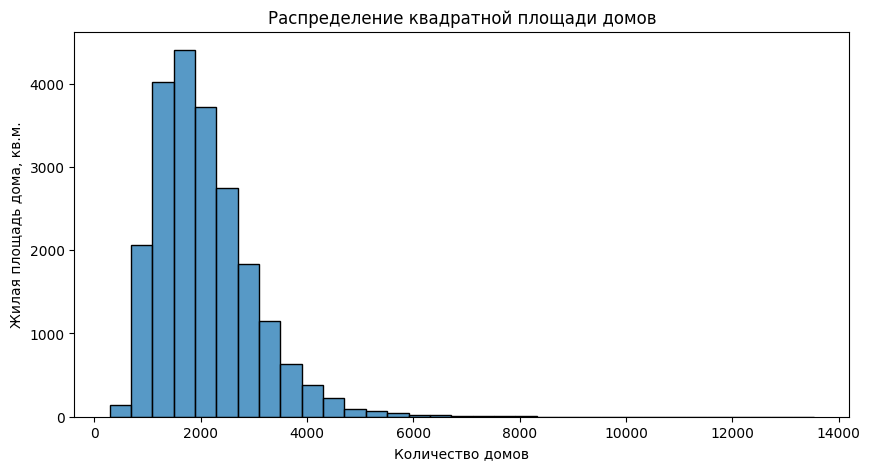

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(df['sqft_living'], bins=33)
plt.title('Распределение квадратной площади домов')
plt.xlabel('Количество домов')
plt.ylabel('Жилая площадь дома, кв.м.');

## Задание 2 
### Изучите распределение года постройки 

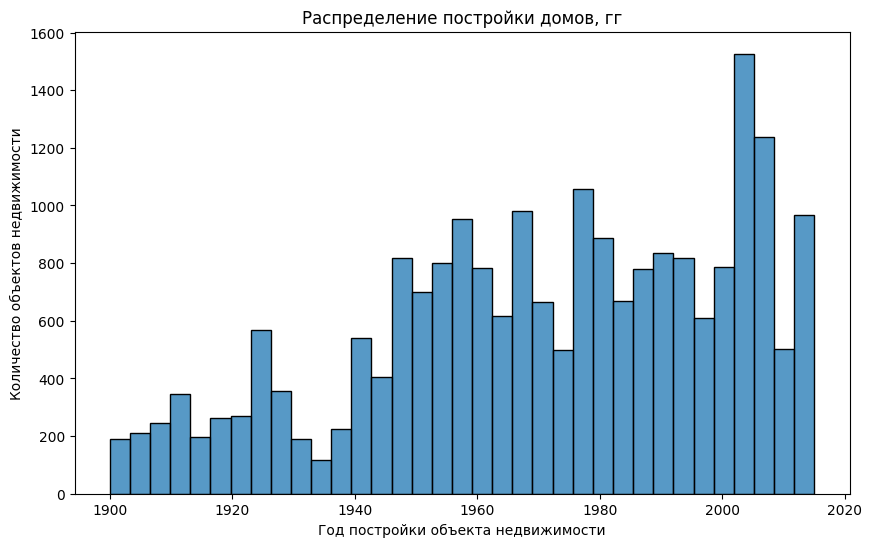

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(df['yr_built']);
plt.title('Распределение постройки домов, гг')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Год постройки объекта недвижимости');

### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [72]:
df_wtfr = df['waterfront'].value_counts()
df_wtfr.index=['no','yes']
df_wtfr

no     21450
yes      163
Name: waterfront, dtype: int64

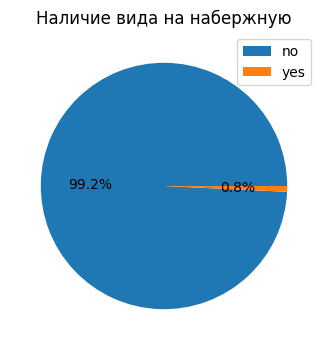

In [82]:
plt.figure(figsize=(6,4))
plt.pie(df_wtfr, autopct='%1.1f%%')
plt.title('Наличие вида на набержную')
plt.legend(df_wtfr.index);

**_Вывод:_** менее 1% представленных домов имеют вид на набережную

## 2.2 Изучите распределение этажей домов 

In [168]:
floors = df['floors'].value_counts()
floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

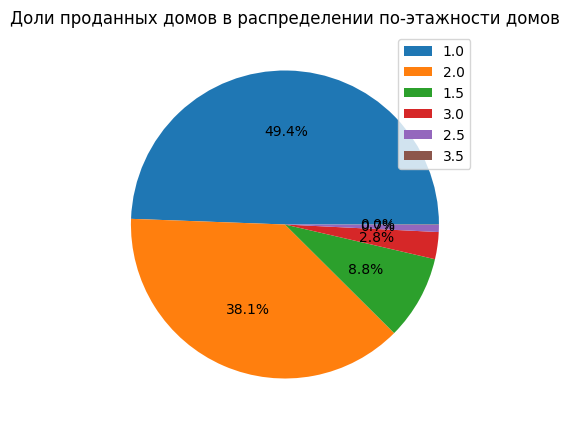

In [170]:
plt.figure(figsize=(8,5))
plt.pie(floors, autopct='%1.1f%%')
plt.title('Доли проданных домов в распределении по-этажности домов')
plt.legend(floors.index);

**_Вывод:_** 
- половина проданных домов - одноэтажные, 
- ~48% - доля домов, с этажностью не более 2-х

### 2.2 Изучите распределение состояния домов

In [145]:
df['condition'].index

RangeIndex(start=0, stop=21613, step=1)

In [188]:
cndt = df['condition'].value_counts()
cndt = cndt.sort_values()
cndt

1       30
2      172
5     1701
4     5679
3    14031
Name: condition, dtype: int64

Text(0.5, 1.0, 'Состояние домов, распределение от ')

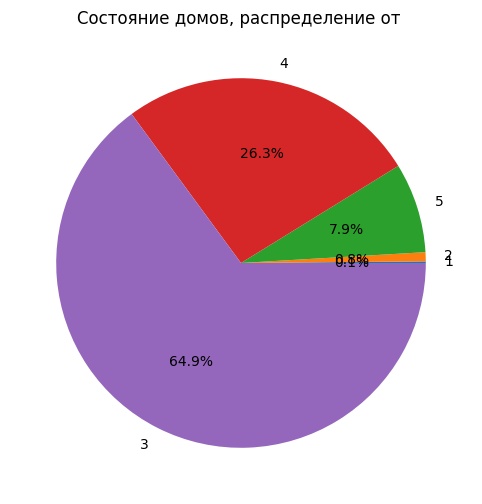

In [198]:
plt.figure(figsize=(8,6))
plt.pie(cndt, autopct='%1.1f%%', labels = cndt.index)
plt.title('Состояние домов, распределение от ')


**_Вывод:_** 
- ~99% всех домов среднего и выше среднего стостоянии

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 3.1.
Посмотрим корреляционные связи по всему dataset

In [204]:
corr_matr = df.corr()
corr_matr = np.round(corr_matr, 1)
corr_matr[np.abs(corr_matr)>0.3]
corr_matr

C:\Users\Регина\AppData\Local\Temp\ipykernel_7332\4183397333.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matr = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,-0.0,0.0,0.0,-0.0,-0.1,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.1
price,-0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.2,-0.0,0.1,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,-0.0,0.1,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.7,0.7,0.3,0.5,0.1,-0.2,0.0,0.2,0.6,0.1
sqft_living,-0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2
sqft_lot,-0.1,0.1,0.0,0.1,0.2,1.0,-0.0,0.0,0.1,-0.0,0.1,0.2,0.0,0.1,0.0,-0.1,-0.1,0.2,0.1,0.7
floors,0.0,0.3,0.2,0.5,0.4,-0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,-0.1,0.0,0.1,0.3,-0.0
waterfront,-0.0,0.3,-0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1,0.1,0.1,-0.0,0.1,0.0,-0.0,-0.0,0.1,0.0
view,0.0,0.4,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.0,0.3,0.2,0.3,-0.1,0.1,0.1,0.0,-0.1,0.3,0.1
condition,-0.0,0.0,0.0,-0.1,-0.1,-0.0,-0.3,0.0,0.0,1.0,-0.1,-0.2,0.2,-0.4,-0.1,0.0,-0.0,-0.1,-0.1,-0.0


Для большей наглядности используем **heatmap**, 'тепловую схему'

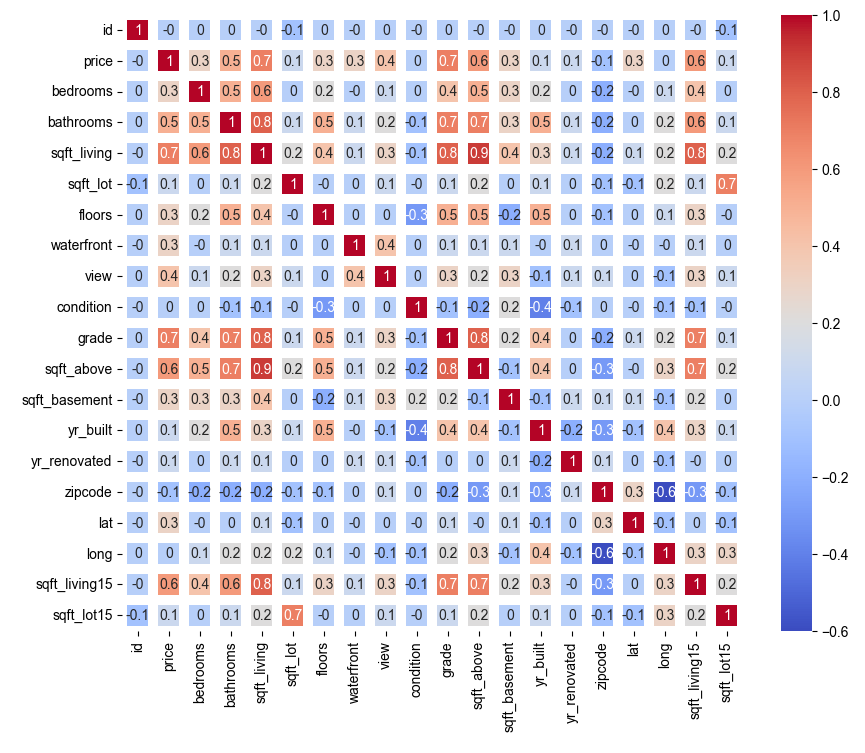

In [210]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matr, annot=True, linewidths=7, cmap='coolwarm')
sns.set(font_scale=0.8)

**_Вывод:_** на схеме видны **прямые** взаимосвязи между:
- жилой площадью и кол-вом спальных комнат, и с кол-вом ванных комнат,
- площадью дома над поверхностью земли и оценкой здания, ~0.8, а также жилой площадью и оценкой здания,

и **обратная** взаимосвязь между:
- параметром долготы и почтовым индексом, значит чем больше значение индекса, тем левее будет находиться дом (в Всточном п/ш),
- также чем выше этажность, тем ниже уровень состояния дома,
и т.д.

### 3.2.
Используем jointplot для рассмотрения отдельных взаимосвязей между признаками

<Figure size 1200x1000 with 0 Axes>

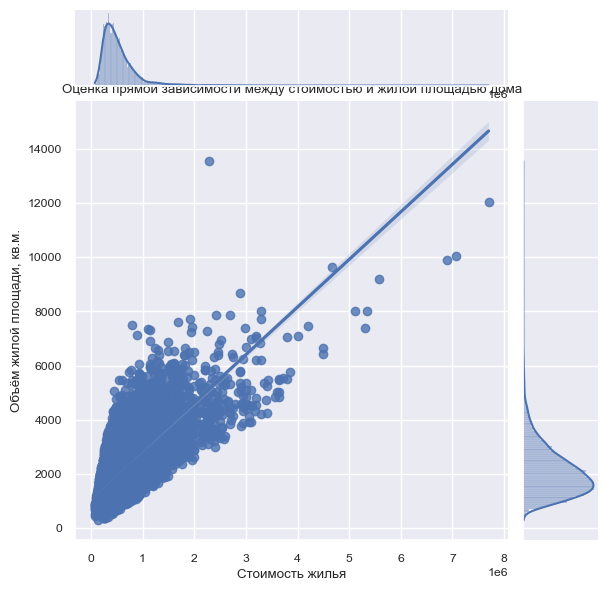

In [221]:
plt.figure(figsize=(12,10))
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');
plt.title('Оценка прямой зависимости между стоимостью и жилой площадью дома')
plt.ylabel('Объём жилой площади, кв.м.')
plt.xlabel('Стоимость жилья');

### 3.3. Ниже визуальный анализ зависимости признака долготы и широты

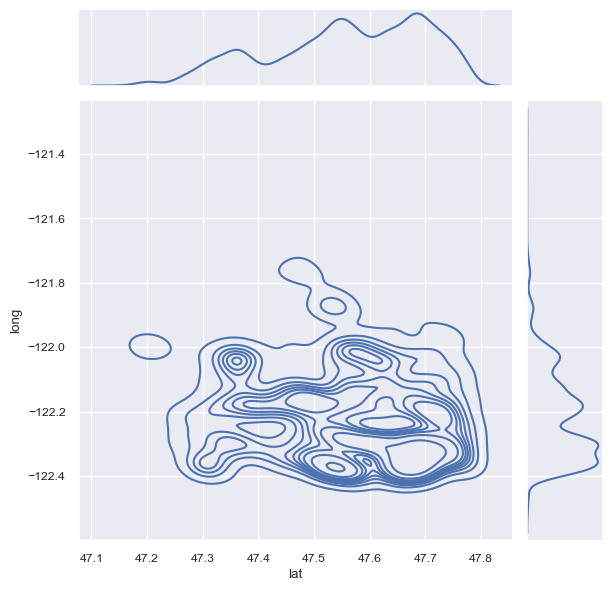

In [223]:
sns.jointplot(x = df['lat'], y=df['long'], kind='kde'); # где сгущенно- скорее всего город

### 3.4.

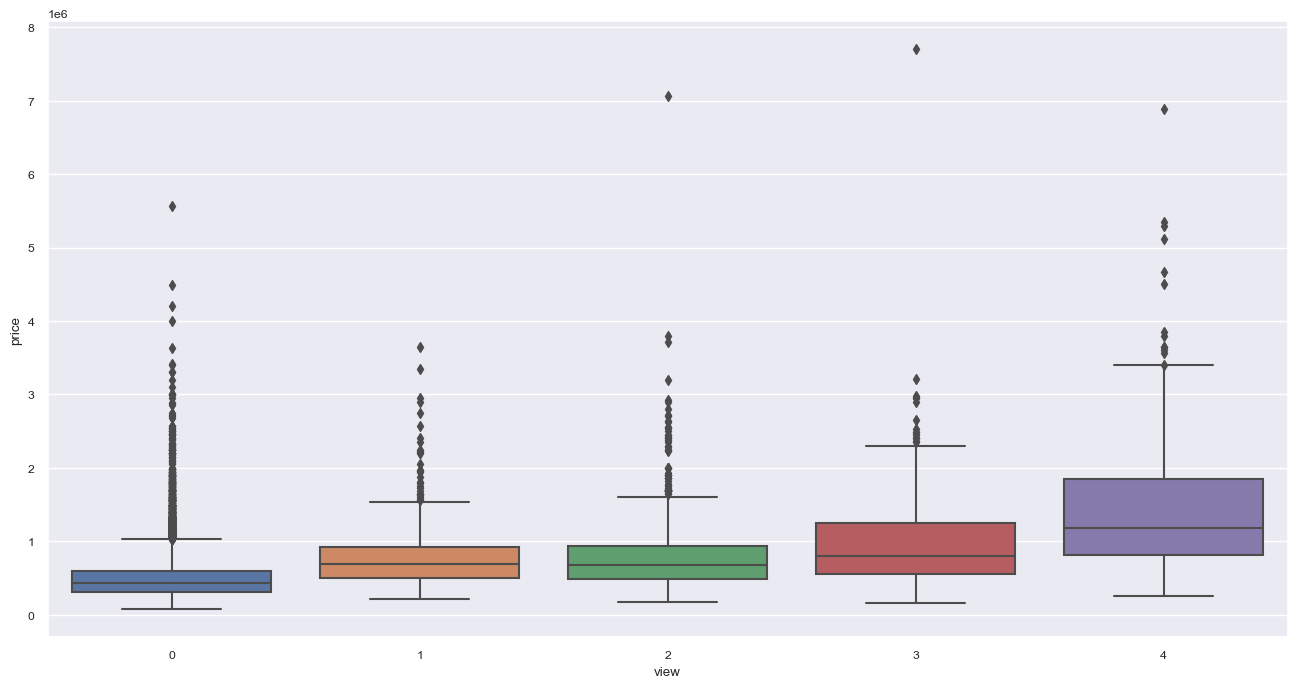

In [239]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['view'], y=df['price'], whis=1.5)
plt.xlabel('view')
plt.ylabel('price');

**_Вывод:_** Вполне логичную картину видим на графике - чем лучше вид, тем намного выше цена. Можно увидеть , что медианное значение цены с лучшим видом, практически на уровне 3-го квартиля цен с видом чуть меньше уровня,  **_т.е. дома с самым лучшим видом значительно увеличивают стоимость домов_**. Это особенно заметно в сравнении с уровнем цен по предыдущим уровням этого признака.

### 3.5

Сейчас рассмотрим взаимосвязь стоимости дома при наличии набережной  **без учета выбросов.**

In [255]:
yes = df['price'][df['waterfront']==1]
no = df['price'][df['waterfront']==0]
yes.describe()

count    1.630000e+02
mean     1.661876e+06
std      1.120372e+06
min      2.850000e+05
25%      7.600000e+05
50%      1.400000e+06
75%      2.215000e+06
max      7.062500e+06
Name: price, dtype: float64

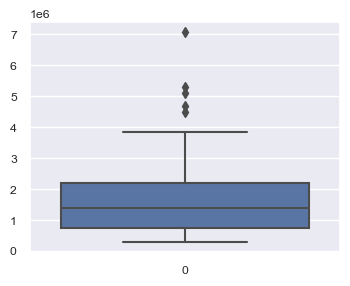

In [254]:
plt.figure(figsize=(4,3))
sns.boxplot(data=[yes]);

**_Вывод:_** 
- Можно увидеть, что в среднем стоимость квартир с набережной около 1,5 млн (что сопоставимо с медианой выше)
- Дома с набережной стоимостью выше 4 млн - можно приравнивать их к "выбросам", что также заметно на гистограмме ниже.

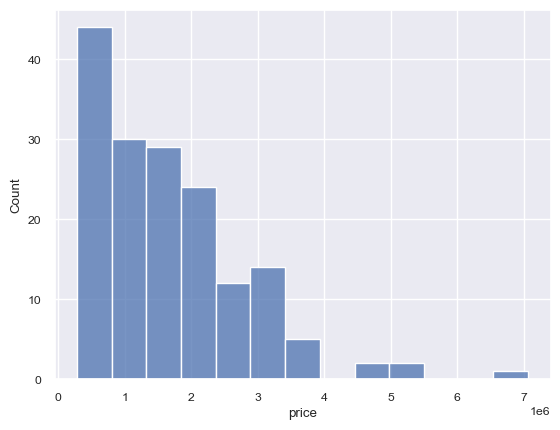

In [258]:
sns.histplot(x=yes);

### 3.6.

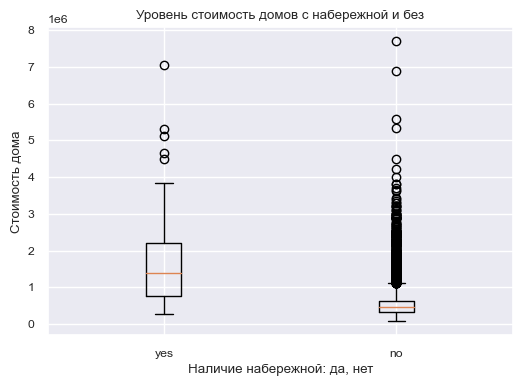

In [262]:
plt.figure(figsize=(6,4))
plt.boxplot([yes, no])
plt.title('Уровень стоимость домов с набережной и без')
plt.xlabel('Наличие набережной: да, нет')
plt.ylabel('Стоимость дома')
plt.xticks([1,2],['yes', 'no']);

Видим, что очень много "выбросов" в статистике домов без набережной, поэтому для наглядности лучше построить график **без данных "выбросов".**

### 3.7.

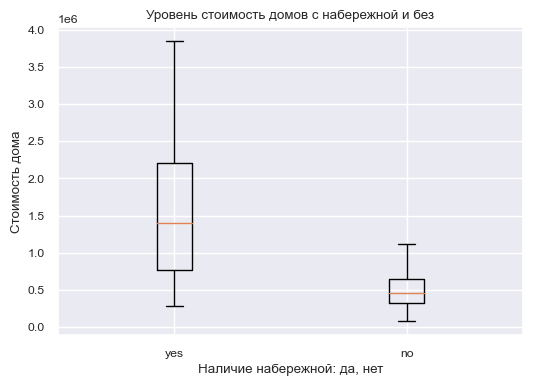

In [264]:
plt.figure(figsize=(6,4))
plt.boxplot([yes, no], showfliers=False)
plt.title('Уровень стоимость домов с набережной и без')
plt.xlabel('Наличие набережной: да, нет')
plt.ylabel('Стоимость дома')
plt.xticks([1,2],['yes', 'no']);

**_Вывод_**: как уже не сложно заметить, в среднем стоимость дома с набережной отличается в ~3 раза (сравниваем медианные значения)

Отобразим этот же график, используя **seaborn**

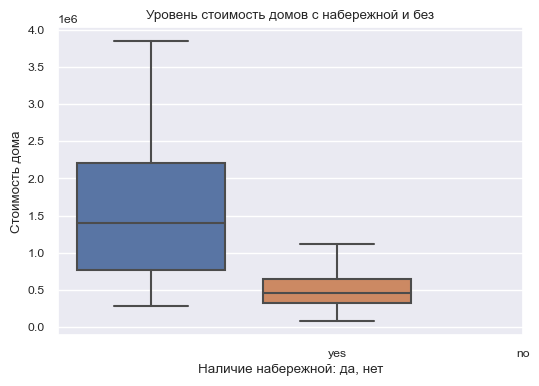

In [265]:
plt.figure(figsize=(6,4))
sns.boxplot(data=[yes, no], showfliers=False)
plt.title('Уровень стоимость домов с набережной и без')
plt.xlabel('Наличие набережной: да, нет')
plt.ylabel('Стоимость дома')
plt.xticks([1,2],['yes', 'no']);